In [29]:
!pip install networkx
!pip install spacy
!python -m spacy download es_core_news_sm
import requests
from spacy.lang.es.stop_words import STOP_WORDS
from bs4 import BeautifulSoup
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict, Counter
from spacy import displacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 42.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# Cargar el modelo de SpaCy en español


In [4]:
nlp = spacy.load("es_core_news_sm")

#Defino URL

In [5]:
url = 'https://cenital.com/los-datos-dicen-trabajamos-mas-y-ganamos-menos/'

#Traigo el contenido de la URL y lo combierto a Texto

In [6]:
# Obtener el contenido HTML de la página
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Extraer el texto del artículo (adaptar según la estructura de la página)


In [7]:
contenido = soup.find("article").get_text()


# Función para limpiar texto

In [8]:
def limpiar_texto(texto):
    doc = nlp(texto)
    palabras = [
        token.text for token in doc
        if token.pos_ != "ADP"
        and not token.is_stop
        and not token.is_punct
        and not token.is_space
        and not token.like_num
        and token.text.lower() not in STOP_WORDS
    ]
    return palabras

# Función para lematizar palabras

In [9]:
def lematizar(palabras):
    doc = nlp(" ".join(palabras))
    return [token.lemma_ for token in doc if token.lemma_ != ""]

# Eliminar elementos multimedia

In [10]:
for tag in soup.find_all(["img", "video", "audio", "iframe", "figure"]):
    tag.decompose()

# Limpiar y lematizar el texto

In [11]:
palabras_limpias = limpiar_texto(contenido)
palabras_lematizadas = lematizar(palabras_limpias)

# Imprimir las palabras lematizadas

In [12]:
print(palabras_lematizadas)

['Inicio', 'Newsletters', 'Rollover', 'dato', 'trabajar', 'ganar', 'número', 'celebrado', 'Gobierno', 'mostrar', 'aumento', 'salario', 'privado', 'formal', 'realidad', 'traducir', 'sueldo', 'hora', 'extra', 'Esteban', 'Rafele', 'abril', 'Compartir', 'economía', 'acomodar', 'programa', 'acordado', 'FMI', 'datos', 'mundo', 'trabajo', 'llamar', 'atención', 'informe', 'iniciar', 'INDEC', 'trabajo', 'informal', 'surgir', 'cosa', 'trabajador', 'año', 'negro', 'tuit', 'ministro', 'Economía', 'Luis', 'Caputo', 'celebrar', 'fortísima', 'recuperación', 'salario', 'privado', 'formal', 'punto', 'real', 'noviembre', 'rápidamente', 'especialista', 'marcar', 'cancha', 'trabajador', 'ganar', 'trabajar', 'hora', 'Caputo', 'tuitear', 'abril', 'Argentina', 'año', 'hablábar', 'impacto', 'devaluación', 'precio', 'negociación', 'salarial', 'categoría', 'trabajador', 'registrar', 'incremento', 'salarial', 'inflación', 'insistir', 'jefe', 'Gabinete', 'Guillermo', 'Francos', 'informir', 'Congreso', 'gustar', '

#Compración entre Nube de Palabras con Tokenizados y Lemanizados

<ipython-input-13-9fd1f4488f13>:28: UserWarning: Glyph 128292 (\N{INPUT SYMBOL FOR LATIN LETTERS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-13-9fd1f4488f13>:28: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128292 (\N{INPUT SYMBOL FOR LATIN LETTERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


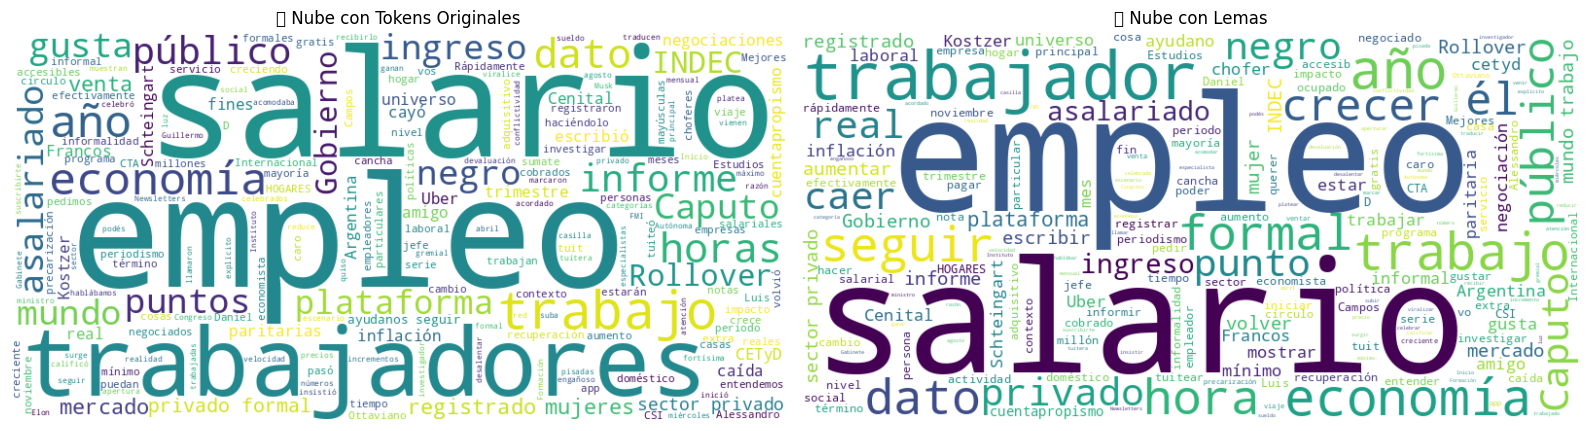

In [13]:
# Extraer párrafos
parrafos = soup.find_all("p")
texto = " ".join([p.get_text() for p in parrafos])

# Obtener tokens limpios
tokens_limpios = limpiar_texto(texto)

# Generar nube de palabras con tokens originales
wordcloud_tokens = WordCloud(width=800, height=400, background_color='white').generate(" ".join(tokens_limpios))

# Lematizar y generar nueva nube
lemmas = lematizar(tokens_limpios)
wordcloud_lemmas = WordCloud(width=800, height=400, background_color='white').generate(" ".join(lemmas))

# Mostrar ambas nubes de palabras
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_tokens, interpolation='bilinear')
plt.axis("off")
plt.title("🔤 Nube con Tokens Originales")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_lemmas, interpolation='bilinear')
plt.axis("off")
plt.title("🧩 Nube con Lemas")

plt.tight_layout()
plt.show()
doc = nlp(texto)

# Mostrar las entidades nombradas (NER)

In [14]:
for ent in doc.ents:
    nombre_etiqueta = ent.label_  # Obtiene el nombre de la etiqueta, por ejemplo, "PERSON" o "GPE"
    print(f"Entidad: {ent.text}, Etiqueta: {nombre_etiqueta}")

Entidad: Si te gusta, Etiqueta: MISC
Entidad: Entonces, Etiqueta: MISC
Entidad: Inicio  Newsletters  Rollover, Etiqueta: PER
Entidad: Gobierno, Etiqueta: LOC
Entidad: FMI, Etiqueta: ORG
Entidad: INDEC, Etiqueta: LOC
Entidad: De ahí surge, Etiqueta: MISC
Entidad: El segundo, Etiqueta: MISC
Entidad: ministro de Economía, Etiqueta: LOC
Entidad: Luis Caputo, Etiqueta: PER
Entidad: Rápidamente, Etiqueta: ORG
Entidad: Caputo, Etiqueta: LOC
Entidad: Argentina, Etiqueta: LOC
Entidad: Gabinete, Etiqueta: PER
Entidad: Guillermo Francos, Etiqueta: PER
Entidad: Congreso, Etiqueta: ORG
Entidad: Rollover, Etiqueta: PER
Entidad: El Gobierno, Etiqueta: MISC
Entidad: Francos, Etiqueta: MISC
Entidad: escribió Caputo, Etiqueta: LOC
Entidad: Luis Campos, Etiqueta: PER
Entidad: Instituto de Estudios, Etiqueta: LOC
Entidad: Formación, Etiqueta: ORG
Entidad: CTA, Etiqueta: ORG
Entidad: Autónoma, Etiqueta: LOC
Entidad: Elon Musk, Etiqueta: PER
Entidad: El Centro de Capacitación, Etiqueta: MISC
Entidad: Estudi

#Mapa de Relaciones de las 10 primeras Entidades Nombradas

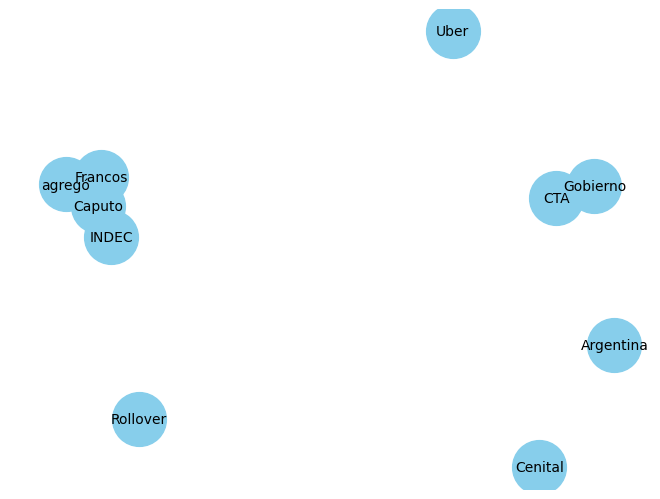

In [15]:
grafo = nx.Graph()

# Agregar nodos para cada entidad nombrada
for ent in doc.ents:
    grafo.add_node(ent.text, label=ent.label_)

# Agregar aristas entre entidades que aparecen en la misma frase
for frase in doc.sents:
    entidades_en_frase = [ent.text for ent in frase.ents]
    for i in range(len(entidades_en_frase)):
        for j in range(i + 1, len(entidades_en_frase)):
            grafo.add_edge(entidades_en_frase[i], entidades_en_frase[j])

# Contar las entidades
conteo_entidades = defaultdict(int)
for ent in doc.ents:
    conteo_entidades[ent.text] += 1

# Obtener las 10 entidades más nombradas
entidades_mas_nombradas = Counter(conteo_entidades).most_common(10)

# Filtrar el grafo
nodos_a_incluir = [entidad[0] for entidad in entidades_mas_nombradas]
subgrafo = grafo.subgraph(nodos_a_incluir)

# Visualizar el subgrafo
nx.draw(subgrafo, with_labels=True, node_color="skyblue", node_size=1500, edge_color="gray", font_size=10)
plt.show()

# Mostrar las frases nominales

In [20]:
print("\nFrases nominales:")
for chunk in doc.noun_chunks:
    print(chunk.text)


Frases nominales:
que
que
Inicio
Los números celebrados por el Gobierno
un aumento
salario privado
que
un mayor sueldo
en horas extras
la economía
nuevo programa acordado con el FMI
, dos datos
el mundo
trabajo
la atención
, un nuevo informe
que
el INDEC
trabajo informal
, entre otras cosas
seis de cada diez trabajadores
hasta 29 años
El segundo, un tuit
ministro
Economía
, Luis Caputo,
que
una fortísima recuperación
salario privado
, de siete puntos reales
, desde noviembre de 2023
los especialistas
le
la cancha
los trabajadores
más horas
Caputo
Argentina
cada día
como un año
impacto
la devaluación
los precios
las negociaciones salariales
Todas las categorías
trabajadores
incrementos salariales
encima de la inflación
el jefe
Gabinete
, Guillermo Francos
, en su informe
Congreso
ese día
Rollover podés
tu casilla
los miércoles
El Gobierno
cualquier escenario
apertura
las negociaciones paritarias
que
Francos
como el salario real
la conflictividad gremial
El salario real
el máximo nivel


#Resumen de Contenido por medio de Frases Nominales


In [19]:
# Extraer frases nominales y contar su frecuencia
frases_nominales = [chunk.text for chunk in doc.noun_chunks]
conteo_frases = Counter(frases_nominales)

# Obtener las frases nominales más frecuentes para el resumen
frases_resumen = [frase for frase, conteo in conteo_frases.most_common(10)]  # Ajustar el número (10 aquí) para más/menos frases en el resumen

# Imprimir el resumen
print("Resumen de contenido:")
for frase in frases_resumen:
    print("- ", frase)

Resumen de contenido:
-  que
-  los trabajadores
-  trabajo
-  le
-  Caputo
-  eso
-  el empleo
-  la economía
-  el mundo
-  el INDEC


#Etiquetado Gramatical

In [21]:
# Recreamos un objeto Doc a partir de los tokens limpios
doc_limpio = nlp(" ".join(tokens_limpios))

print("\n--- Etiquetado Gramatical del Texto Limpio ---")
for token in doc_limpio:
    print(f"'{token.text}' -> {token.pos_} ({spacy.explain(token.pos_)}) -> {token.tag_}")


--- Etiquetado Gramatical del Texto Limpio ---
'gusta' -> VERB (verb) -> VERB
'ayudanos' -> ADJ (adjective) -> ADJ
'seguir' -> VERB (verb) -> VERB
'haciéndolo' -> VERB (verb) -> VERB
'gusta' -> NOUN (noun) -> NOUN
'ayudanos' -> ADJ (adjective) -> ADJ
'seguir' -> VERB (verb) -> VERB
'haciéndolo' -> VERB (verb) -> VERB
'ayudanos' -> NOUN (noun) -> NOUN
'seguir' -> VERB (verb) -> VERB
'Inicio' -> PROPN (proper noun) -> PROPN
'Newsletters' -> PROPN (proper noun) -> PROPN
'Rollover' -> PROPN (proper noun) -> PROPN
'números' -> NOUN (noun) -> NOUN
'celebrados' -> ADJ (adjective) -> ADJ
'Gobierno' -> PROPN (proper noun) -> PROPN
'muestran' -> VERB (verb) -> VERB
'aumento' -> NOUN (noun) -> NOUN
'salario' -> ADJ (adjective) -> ADJ
'privado' -> ADJ (adjective) -> ADJ
'formal' -> ADJ (adjective) -> ADJ
'realidad' -> NOUN (noun) -> NOUN
'traducen' -> VERB (verb) -> VERB
'sueldo' -> NOUN (noun) -> NOUN
'horas' -> NOUN (noun) -> NOUN
'extras' -> ADJ (adjective) -> ADJ
'economía' -> ADJ (adjective)

#Grafico de barras de Categorias Gramaticales
##Para ver que tal funciona la funcion de limpieza

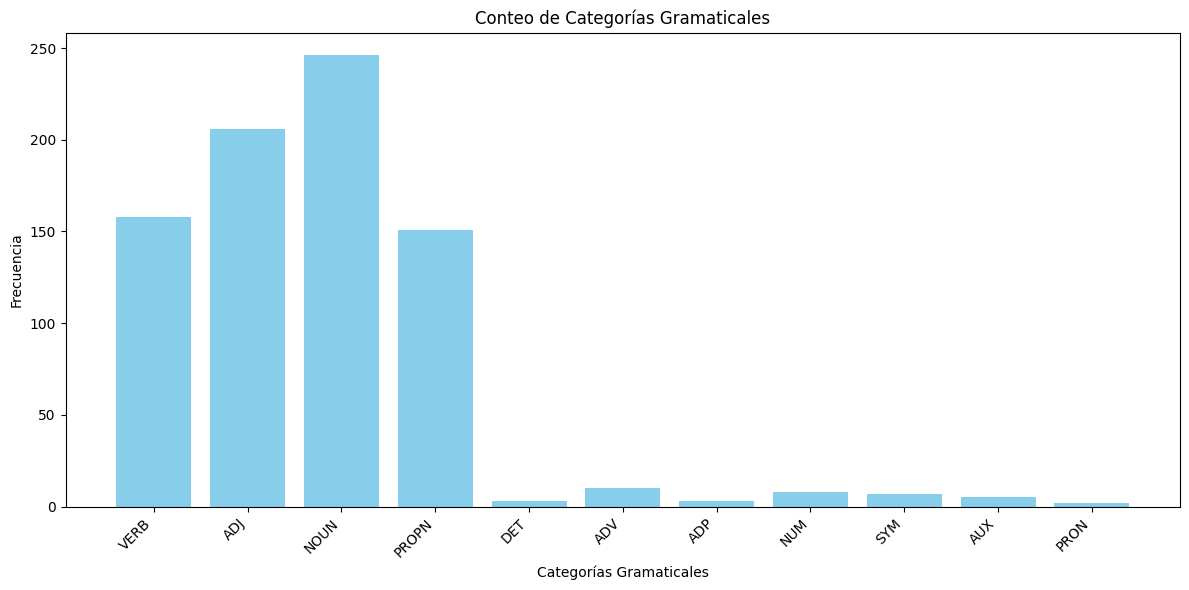

In [23]:
# Diccionario para almacenar las frecuencias de cada categoría gramatical
conteo_pos = {}

# Iterar sobre los tokens y contar las categorías gramaticales
for token in doc_limpio:
    pos = token.pos_
    conteo_pos[pos] = conteo_pos.get(pos, 0) + 1

# Obtener las categorías y sus frecuencias
categorias = list(conteo_pos.keys())
frecuencias = list(conteo_pos.values())

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(categorias, frecuencias, color='skyblue')
plt.title('Conteo de Categorías Gramaticales')
plt.xlabel('Categorías Gramaticales')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

# Analisis de dependencia sintactica

In [24]:
for token in doc:
     if not token.is_space:
        print(f"'{token.text}' -> {token.dep_} ({spacy.explain(token.dep_)}) -> '{token.head.text}'")

'Si' -> mark (marker) -> 'gusta'
'te' -> iobj (indirect object) -> 'gusta'
'gusta' -> ROOT (root) -> 'gusta'
'lo' -> det (determiner) -> 'hacemos'
'que' -> obj (object) -> 'hacemos'
'hacemos' -> csubj (clausal subject) -> 'gusta'
',' -> punct (punctuation) -> 'ayudanos'
'ayudanos' -> obj (object) -> 'hacemos'
'a' -> mark (marker) -> 'seguir'
'seguir' -> advcl (adverbial clause modifier) -> 'ayudanos'
'haciéndolo' -> xcomp (open clausal complement) -> 'seguir'
'Si' -> mark (marker) -> 'gusta'
'te' -> iobj (indirect object) -> 'gusta'
'gusta' -> advcl (adverbial clause modifier) -> 'hacemos'
'lo' -> det (determiner) -> 'hacemos'
'que' -> obj (object) -> 'hacemos'
'hacemos' -> csubj (clausal subject) -> 'gusta'
',' -> punct (punctuation) -> 'ayudanos'
'ayudanos' -> conj (conjunct) -> 'hacemos'
'a' -> mark (marker) -> 'seguir'
'seguir' -> advcl (adverbial clause modifier) -> 'ayudanos'
'haciéndolo' -> xcomp (open clausal complement) -> 'seguir'
'Entonces' -> advmod (adverbial modifier) -> 

/usr/local/lib/python3.11/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term 'expl:pass' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))
/usr/local/lib/python3.11/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term 'expl:pv' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))
/usr/local/lib/python3.11/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term 'expl:impers' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))


In [31]:
# Obtener el quinto párrafo
# Usamos find_all para obtener todos los párrafos y luego seleccionamos el cuarto por índice (índice 3)
quinto_parrafo = soup.find_all("p")[6].get_text()

# Procesar el quinto párrafo con SpaCy
doc = nlp(quinto_parrafo)

# Análisis de dependencia sintáctica
for token in doc:
    if not token.is_space:
        print(f"'{token.text}' -> {token.dep_} ({spacy.explain(token.dep_)}) -> '{token.head.text}'")

# Visualizar con displacy
displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})

'Mientras' -> mark (marker) -> 'acomodaba'
'la' -> det (determiner) -> 'economía'
'economía' -> nsubj (nominal subject) -> 'acomodaba'
'se' -> expl:pv (None) -> 'acomodaba'
'acomodaba' -> advcl (adverbial clause modifier) -> 'llamaron'
'al' -> case (case marking) -> 'programa'
'nuevo' -> amod (adjectival modifier) -> 'programa'
'programa' -> obj (object) -> 'acomodaba'
'acordado' -> amod (adjectival modifier) -> 'programa'
'con' -> case (case marking) -> 'FMI'
'el' -> det (determiner) -> 'FMI'
'FMI' -> obl (oblique nominal) -> 'acordado'
',' -> punct (punctuation) -> 'datos'
'dos' -> nummod (numeric modifier) -> 'datos'
'datos' -> nsubj (nominal subject) -> 'llamaron'
'sobre' -> case (case marking) -> 'mundo'
'el' -> det (determiner) -> 'mundo'
'mundo' -> nmod (modifier of nominal) -> 'datos'
'del' -> case (case marking) -> 'trabajo'
'trabajo' -> nmod (modifier of nominal) -> 'mundo'
'llamaron' -> ROOT (root) -> 'llamaron'
'la' -> det (determiner) -> 'atención'
'atención' -> obj (objec

/usr/local/lib/python3.11/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term 'expl:pv' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))
